<h1 style="text-align: center">
Analyse en Composantes Principales (ACP)

<h1>

<h1>



##  ***INTRODUCTION GENERAL***

<hr>
<hr>

* ### L'***ACP*** est une méthode de la famille de l'***analyse des données*** (AFC, AFCM, AFD, ACI ...) , qui consiste à ***transformer*** un ensemble de variables/features (+ ou -) ***corrélées*** en nouvelles variables ***décorrélées***, indépendantes les unes des autres.

* ### Ces nouvelles variables sont nommées « ***Composantes Principales*** » ou ***axes principaux d'inertie***. 
* ### ***Features*** ----> ***ACP*** ----> ***Composantes Principales***
* ### Elle permet de ***résumer*** l'information en ***réduisant*** le nombre de variables, et donc de dimensions.
* ### ----> On peut donc plus facilement ***visualiser*** nos données, grâce à la ***réduction du nombres de dimensions***.  
* ### ---> ***2 DIMENSIONS***, formées par les 2 axes ***(CP-1, CP-2)***.   (en général)
* ### Elle permet également de visualiser la ***nature*** et l'***intensité*** de la ***corrélation*** entre nos features

<hr>
<hr>

In [234]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [236]:
# Charger les données
df = sns.load_dataset("iris")

In [237]:
df.shape

(150, 5)

In [238]:
# Description données
df.sample(4)

,sepal_length,sepal_width,petal_length,petal_width,species
132,6.4,2.8,5.6,2.2,virginica
49,5.0,3.3,1.4,0.2,setosa
59,5.2,2.7,3.9,1.4,versicolor
122,7.7,2.8,6.7,2.0,virginica


In [239]:
df.value_counts(["species"]).to_frame()

,0
species,
setosa,50
versicolor,50
virginica,50



<h1 style="text-align: center">
Visualisation Classique <h/1>



# <u> ***1 Dimension***</u> :

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



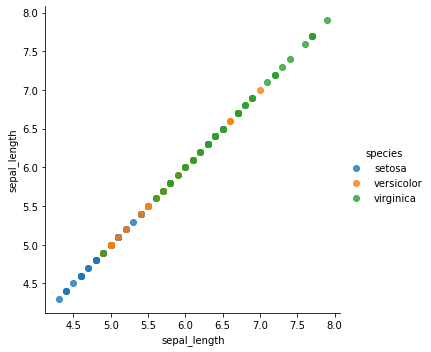

In [240]:
g = sns.lmplot("sepal_length",
               "sepal_length",
               hue="species",
               data=df,
               fit_reg=False,
               scatter=True,
               height=5)

# <u>***2 Dimensions***</u> :

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



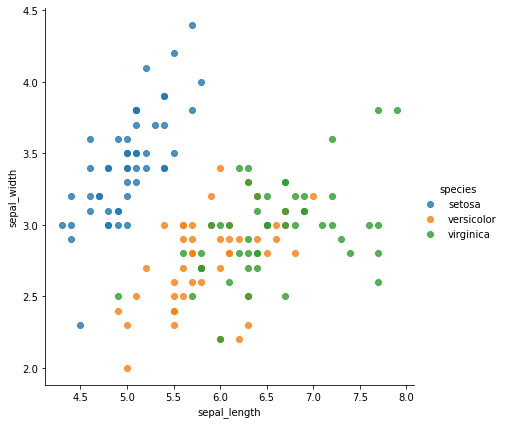

In [241]:
g = sns.lmplot("sepal_length",
               "sepal_width",
               hue="species",
               data=df,
               fit_reg=False,
               scatter=True,
               height=6)

# <u>***3 Dimensions***</u> :

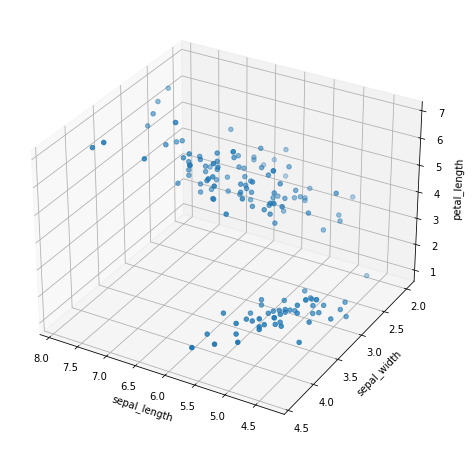

In [242]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
x = df["sepal_length"]
y = df["sepal_width"]
z = df["petal_length"]

ax.scatter(x, y, z)

ax.set_xlabel("sepal_length")
ax.set_ylabel("sepal_width")
ax.set_zlabel("petal_length")

ax.view_init(elev=30, azim=120)

plt.show()


In [243]:
import plotly.express as px

fig = px.scatter_3d(df, x="sepal_length", y="sepal_width", z="petal_length", color="species")
fig.show()

# <u>***Dimensions 4***</u> :

In [244]:
import plotly.express as px

fig = px.scatter_3d(df, x="sepal_length", y="sepal_width", z="petal_length", size="petal_width", color="species")
fig.show()

<hr>


* ### A partir de la ***Dimension 4***, il est compliqué (voir impossible) de représenter ***graphiquement*** les données.

* ### Si l'on veut continuer à pouvoir les observer ***visuellement*** avec un graphique, nous allons devoir utiliser une autre stratégie.
* ### ---> C'est là que l'***Analyse en Composantes Principales*** (ACP) intervient !!
* ### l'ACP conserve presque ***l'intégralité de l'information*** contenus dans les features, avec un rendu en ***2D*** !! 

<hr>

<h1 style="text-align: center"> 
 Concrètement

In [245]:
# features et target
y = df["species"]
X = df.drop(columns=["species"])

In [246]:
# Créer l'objet ACP
pca = PCA(n_components=4)       # n_components = n_features

In [247]:
# Scaling
X_scale = X / X.std(axis=0)

In [248]:
# Appliquer l'ACP aux données
X_pca = pca.fit_transform(X_scale)

,sepal_length,sepal_width,petal_length,petal_width,species,CP-1,CP-2,CP-3,CP-4
90,5.5,2.6,4.4,1.2,versicolor,0.278146,-1.116289,0.094172,0.269753
18,5.7,3.8,1.7,0.3,setosa,-1.892233,1.400328,-0.373093,-0.060892
40,5.0,3.5,1.3,0.3,setosa,-2.278841,0.440241,0.034778,-0.106626
134,6.1,2.6,5.6,1.4,virginica,1.198458,-0.808606,-0.164174,0.487849
68,6.2,2.2,4.5,1.5,versicolor,1.221003,-1.616827,-0.480694,-0.225146


,Minimum,Maximum
CP-1,-2.765081,3.299641
CP-2,-2.645211,2.677315
CP-3,-0.854559,1.002044
CP-4,-0.468128,0.487849


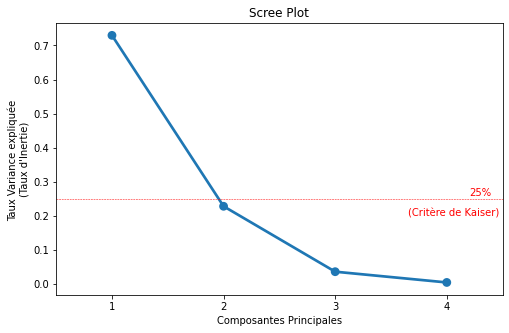

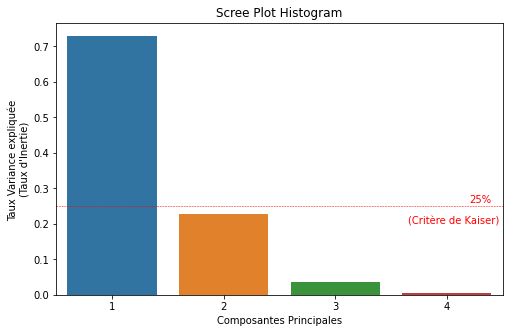

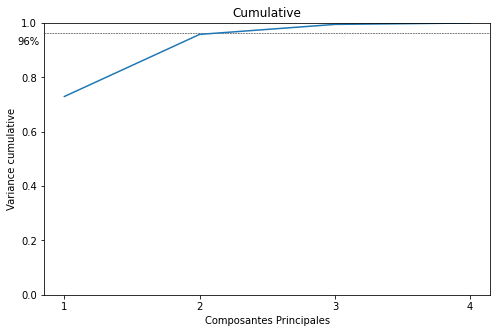

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



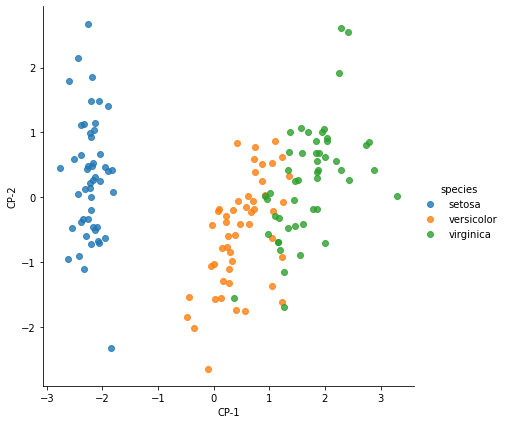

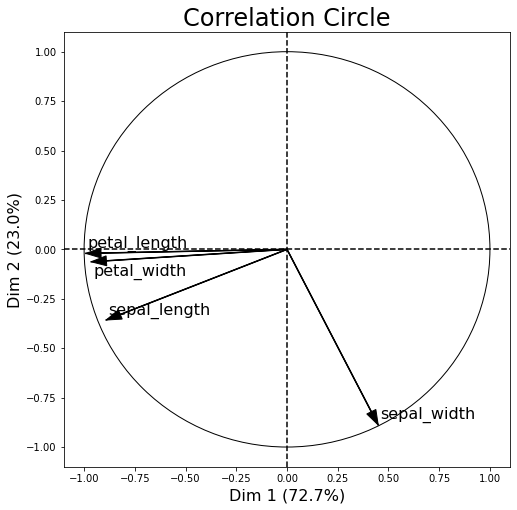

In [249]:
# Dataframe
df_cp = df
for i in range(0, 4):
    df_cp["CP-" + str(i + 1)] = X_pca[:, i]
display(df_cp.sample(5))

X_pca_df_min = pd.DataFrame(X_pca).min().to_frame()
X_pca_df_max = pd.DataFrame(X_pca).max().to_frame()
X_pca_df = pd.concat([X_pca_df_min.rename(columns={0: "Minimum"}), X_pca_df_max.rename(columns={0: "Maximum"})], axis=1)
X_pca_df.index = ["CP-1", "CP-2", "CP-3", "CP-4"]
display(X_pca_df)


# Scree plot (éboulis)
ind = np.arange(0, 4)
(fig, ax) = plt.subplots(figsize=(8, 5))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
plt.axhline(y = 0.25, linewidth = .5, color = "red", linestyle = "--") # 25% = 100 / 4 (nb features)
plt.text(x=3.2, y=0.26, s="25%", fontsize=10, color="red")
plt.text(x=2.65, y=0.2, s="(Critère de Kaiser)", fontsize=10, color="red")

ax.set_title("Scree Plot")
ax.set_xticks(ind)
ax.set_xticklabels(ind+1)
ax.set_xlabel("Composantes Principales")
ax.set_ylabel("Taux Variance expliquée \n(Taux d'Inertie)")
plt.show()


# Histogramme Scree Plot
ind = np.arange(0, 4)
(fig, ax) = plt.subplots(figsize=(8, 5))
sns.barplot(x=ind, y=pca.explained_variance_ratio_, )
plt.axhline(y = 0.25, linewidth = .5, color = "red", linestyle = "--") 
plt.text(x=3.2, y=0.26, s="25%", fontsize=10, color="red")
plt.text(x=2.65, y=0.2, s="(Critère de Kaiser)", fontsize=10, color="red")
ax.set_title("Scree Plot Histogram")
ax.set_xticks(ind)
ax.set_xticklabels(ind+1)
ax.set_xlabel("Composantes Principales")
ax.set_ylabel("Taux Variance expliquée \n(Taux d'Inertie)")
plt.show()


# Cumulative
ind = np.arange(0, 4)
(fig, ax) = plt.subplots(figsize=(8, 5))
ax.set_xticks(ind)
ax.set_xticklabels(ind+1)
plt.ylim(0, 1)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.axhline(y = 0.962, linewidth = .5, color = "black", linestyle = "--") 
plt.text(x=-0.35, y=0.92, s="96%", fontsize=10, color="black")
plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance)
plt.xlabel("Composantes Principales")
plt.ylabel("Variance cumulative")
plt.title("Cumulative")
plt.show()


# Scatter ACP
g = sns.lmplot("CP-1",
               "CP-2",
               hue="species",
               data=df_cp,
               fit_reg=False,
               scatter=True,
               height=6)
plt.show()


# Cercle de Corrélation
from mlxtend.plotting import plot_pca_correlation_graph
from mlxtend.data import iris_data
X, y = iris_data()

X_norm = X / X.std(axis=0) # Toujours

feature_names = [
  "sepal_length",
  "sepal_width",
  "petal_length",
  "petal_width"]

figure, correlation_matrix = plot_pca_correlation_graph(X_norm, 
                                                        feature_names,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=8)
